<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Ellipses-with-Shapely" data-toc-modified-id="Ellipses-with-Shapely-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Ellipses with Shapely</a></span></li><li><span><a href="#by-tile_id" data-toc-modified-id="by-tile_id-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>by tile_id</a></span></li><li><span><a href="#by-obsid" data-toc-modified-id="by-obsid-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>by obsid</a></span></li><li><span><a href="#Shapely-checks" data-toc-modified-id="Shapely-checks-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Shapely checks</a></span></li></ul></div>

# Ellipses with Shapely 

In [1]:
from planet4 import markings

In [2]:
d = dict(x=1, y=2, radius_1=3, radius_2=2, angle=35)
blotch = markings.Blotch(pd.Series(d))

In [3]:
%matplotlib inline

In [5]:
from planet4 import io, plotting
obsid = 'ESP_011544_0985'
id_ = 'bdb'
pm = io.PathManager(obsid=obsid, datapath='p4_analysis/p4_catalog')

KeyError: 'ground_projection'

In [ ]:
pm.obsid_final_blotches_path

In [ ]:
from planet4.catalog_production import ReleaseManager

In [ ]:
rm = ReleaseManager('v1.0')

In [ ]:
df = rm.read_blotch_file()

In [ ]:
df = pd.read_csv(pm.obsid_final_blotches_path)

# by tile_id

In [6]:
fans = pd.read_csv("/Users/klay6683/Dropbox/CTX_to_jpg/P4_catalog_v1/P4_catalog_v1.0_cut_0.5_fan.csv")

blotches = pd.read_csv("/Users/klay6683/Dropbox/CTX_to_jpg/P4_catalog_v1/P4_catalog_v1.0_cut_0.5_blotch.csv")

In [8]:
id_ = 'bdb'

In [10]:
from planet4 import io

In [11]:
blotches = blotches[blotches.tile_id == io.check_and_pad_id(id_)]

In [12]:
fans = fans[fans.tile_id == io.check_and_pad_id(id_)]

In [13]:
import geopandas as gp

In [14]:
import shapely

In [15]:
gs_blotch = gp.GeoSeries([markings.Blotch(row).to_shapely() for _,row in blotches.iterrows()])

gs_fans = gp.GeoSeries([markings.Fan(row).to_shapely() for _,row in fans.iterrows()])

In [16]:
gs = pd.concat([gs_blotch, gs_fans], ignore_index=True, sort=True)

In [17]:
gs.head()

0    POLYGON ((155.3051658836881 472.8084264553739,...
1    POLYGON ((211.6192116049175 550.8363739068183,...
2    POLYGON ((633.2858484015004 138.7152215327977,...
3    POLYGON ((-2.658795681296709 245.5861936207943...
4    POLYGON ((317.9862579337073 122.4427894462133,...
dtype: object

In [28]:
id_ = 'bdb'
p4id = markings.TileID(id_)

In [31]:
%matplotlib ipympl

UsageError: unrecognized arguments: # widget


In [32]:
p4id.plot_fans(data=fans)
ax =plt.gca()
p4id.plot_blotches(data=blotches, ax=ax)

FigureCanvasNbAgg()

In [33]:
gs.plot()
ax = plt.gca()
ax.set_xlim((0, markings.IMG_X_SIZE))
ax.set_ylim((0, markings.IMG_Y_SIZE))
ax.invert_yaxis()

FigureCanvasNbAgg()

In [34]:
gs.head()

0    POLYGON ((155.3051658836881 472.8084264553739,...
1    POLYGON ((211.6192116049175 550.8363739068183,...
2    POLYGON ((633.2858484015004 138.7152215327977,...
3    POLYGON ((-2.658795681296709 245.5861936207943...
4    POLYGON ((317.9862579337073 122.4427894462133,...
dtype: object

In [35]:
from shapely.ops import unary_union

In [36]:
unionized = gs.unary_union

In [39]:
x, y = markings.calc_fig_size(8)

In [38]:
import seaborn as sns
sns.set_context('talk')

In [40]:
squared_pixel_scale = fans.map_scale.iloc[0]**2
squared_pixel_scale

0.0625

In [41]:
fans.map_scale.iloc[0]

0.25

In [42]:
unionized.area

121734.52659382664

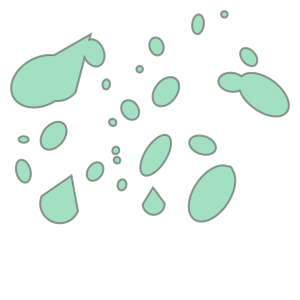

In [43]:
unionized

In [44]:
area = unionized.area * squared_pixel_scale
area

7608.407912114165

In [45]:
pixel_area = markings.IMG_X_SIZE * markings.IMG_Y_SIZE
tile_area = pixel_area * squared_pixel_scale
tile_area

34020.0

In [46]:
fraction = area / tile_area
fraction

0.2236451473284587

In [47]:
fig, ax = plt.subplots(ncols=2, figsize=(1.8*x, y), constrained_layout=True)
p4id.plot_fans(data=fans, ax=ax[0])
p4id.plot_blotches(data=blotches, ax=ax[0])
# p4id.show_subframe(ax=ax[1])
gp.GeoSeries(unionized).boundary.plot(ax=ax[1])
ax[1].set_xlim(-25, markings.IMG_X_SIZE+25)
ax[1].set_ylim(markings.IMG_Y_SIZE+25, -25)

ax[1].set_axis_off()
fig.suptitle(id_)
ax[0].set_title('Combined fans and blotches')
ax[1].set_title(f"""Union out of shapely fans and blotches.
Area: {area:.0f} $m^2$; Fraction: {fraction*100:.0f} %""")
fig.savefig('shapely_both.png', dpi=100)

FigureCanvasNbAgg()

In [48]:
poly = unionized[0]

In [49]:
poly.boundary.xy[0][0]

445.19308606891116

In [50]:
df1 = gp.GeoDataFrame({'geometry': gs})
df1.head()

,geometry
0,"POLYGON ((155.3051658836881 472.8084264553739,..."
1,"POLYGON ((211.6192116049175 550.8363739068183,..."
2,"POLYGON ((633.2858484015004 138.7152215327977,..."
3,POLYGON ((-2.658795681296709 245.5861936207943...
4,"POLYGON ((317.9862579337073 122.4427894462133,..."


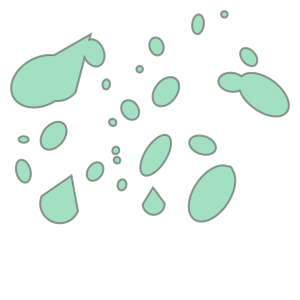

In [51]:
unionized

In [52]:
inters = gp.overlay(df1, df1, how='intersection')
inters.plot()

FigureCanvasNbAgg()

# by obsid

In [53]:
fans.columns

Index(['angle', 'distance', 'tile_id', 'image_x', 'image_y', 'marking_id',
       'n_votes', 'obsid', 'spread', 'version', 'vote_ratio', 'x', 'x_angle',
       'y', 'y_angle', 'l_s', 'north_azimuth', 'map_scale',
       'BodyFixedCoordinateX', 'BodyFixedCoordinateY', 'BodyFixedCoordinateZ',
       'PlanetocentricLatitude', 'PlanetographicLatitude',
       'PositiveEast360Longitude'],
      dtype='object')

In [54]:
fans.l_s.value_counts()

242.279    5
Name: l_s, dtype: int64

In [55]:
obsid = 'ESP_012643_0945'
obsid = 'ESP_013049_0950'
# obsid = 'ESP_011447_0950'

In [71]:
fans = pd.read_csv("/Users/klay6683/Dropbox/data/planet4/p4_for_Zade/P4_catalog_v1.1/P4_catalog_v1.1_L1C_cut_0.5_fan.csv

blotches = pd.read_csv("/Users/klay6683/Dropbox/data/planet4/p4_for_Zade/P4_catalog_v1.1/P4_catalog_v1.1_L1C_cut_0.5_blotch.csv)

SyntaxError: EOL while scanning string literal (<ipython-input-71-2127ac6dac67>, line 1)

In [72]:
fans[fans.obsid.map(lambda x: x.endswith("_0950"))].obsid.value_counts()

ESP_020146_0950    2698
ESP_020357_0950    2530
ESP_020476_0950    2081
ESP_020568_0950    1934
ESP_020779_0950    1305
ESP_021491_0950    1171
ESP_020150_0950     879
ESP_012212_0950     829
ESP_011448_0950     745
ESP_011447_0950     708
ESP_012693_0950     688
ESP_013049_0950     625
ESP_011843_0950     527
ESP_011777_0950     480
ESP_020401_0950     452
ESP_012838_0950     439
ESP_012344_0950     305
ESP_011921_0950     264
ESP_012753_0950     263
ESP_012265_0950     227
ESP_013260_0950     218
ESP_012845_0950     204
ESP_020480_0950     148
ESP_021482_0950      76
ESP_020783_0950      66
ESP_020902_0950      64
ESP_011348_0950       4
ESP_022193_0950       1
Name: obsid, dtype: int64

In [73]:
fans_obsid = fans.query("obsid == @obsid")
blotches_obsid = blotches.query("obsid == @obsid")

In [74]:
fans_obsid.l_s.value_counts()

262.343    625
Name: l_s, dtype: int64

In [75]:
fans_obsid.tile_id.nunique()

68

In [92]:
gs_blotch = gp.GeoSeries([markings.Blotch(row, scope='hirise').to_shapely() for _,row in blotches_obsid.iterrows()])

gs_fans = gp.GeoSeries([markings.Fan(row, scope='hirise').to_shapely() for _,row in fans_obsid.iterrows()])

In [93]:
gs = pd.concat([gs_blotch, gs_fans], ignore_index=True, sort=True)

In [94]:
gs.shape

(1099,)

In [95]:
unioned = gs.unary_union

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 1321.0404031739024 466.44991522170005 at 1321.0404031739024 466.44991522170005


ValueError: No Shapely geometry can be created from null value

In [97]:
fans_obsid.map_scale.value_counts()

0.5    625
Name: map_scale, dtype: int64

# Shapely checks

In [84]:
fan1 = markings.Fan(pd.Series({'x':100, 'y':200, 'angle':30, 'spread':10, 'distance':100}))

In [85]:
fan1

markings.Fan object. Input data:
base: [100. 200.]
armlength: 92.30623464972037
arm1: [183.65785926 239.01030044]
arm2: [175.61284081 252.94468112]

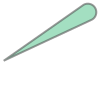

In [87]:
fan1.to_shapely()